# NHẬP DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

mall_customers_df=pd.read_csv('./Mall_Customers.csv')


# in 5 dòng đầu tiên 

In [3]:
print(mall_customers_df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


## Mô tả data
CustomerID: Mã ID của từng khách hàng.

Gender: Giới tính của khách hàng.

Age: Độ tuổi của khách hàng.

Annual Income (k$): Thu nhập hàng năm của khách hàng.

Spending Score (1-100): Điểm chi tiêu.

Kiểm tra giá trị null

In [4]:
mall_customers_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
mall_customers_df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df = pd.get_dummies(mall_customers_df, columns = ['Gender'], prefix = ['Gender'])
#df.head()

Female    112
Male       88
Name: Gender, dtype: int64


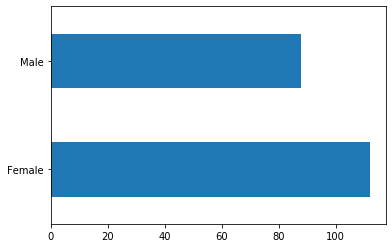

In [7]:
gender=mall_customers_df['Gender'].value_counts()
print(gender)
gender.plot(kind='barh')

Từ đây có thể thấy nữ nhiều hơn nam trong data này.

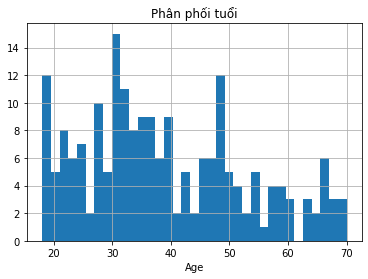

In [8]:
mall_customers_df.hist('Age', bins=35);
plt.title('Phân phối tuổi');
plt.xlabel('Age');



Độ tuổi chủ yếu là từ 30-40 tuổi. Tương ứng với thống kê mô tả, độ tuổi trung bình là 38. có ít khách hàng lớn tuổi (phân phối bị lệch phải, có đuôi dài hơn). Như vậy có thể đối tượng thu hút khách hàng tại trung tâm mua sắm này từ độ tuổi 30-40.

Chúng ta có thể biểu diễn biểu đồ histogram độ tuổi theo giới nam và nữ trên cùng một biểu đồ.


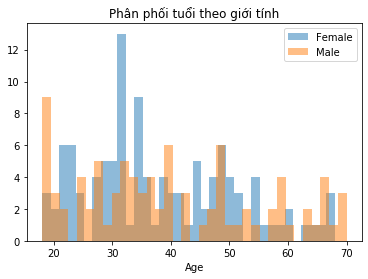

In [9]:
plt.hist('Age',data=mall_customers_df[mall_customers_df['Gender']=='Female'], label='Female', alpha=0.5, bins=35);        
plt.hist('Age',data=mall_customers_df[mall_customers_df['Gender']=='Male'], label='Male', alpha=0.5, bins=35);
plt.title('Phân phối tuổi theo giới tính');
plt.xlabel('Age');
plt.legend();

Tiếp theo chúng ta xét theo thu nhập.

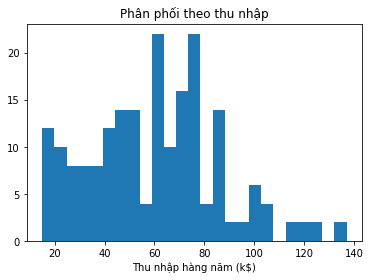

In [10]:
plt.hist(mall_customers_df['Annual Income (k$)'], bins=25);
plt.title('Phân phối theo thu nhập');
plt.xlabel('Thu nhập hàng năm (k$)');



Từ biểu đồ ta thấy thu nhập chủ yếu từ 60 đến 80 (k$). Tương tự như trên ta xét thêm yếu tố giới tính có ảnh hưởng đến thu nhập không?

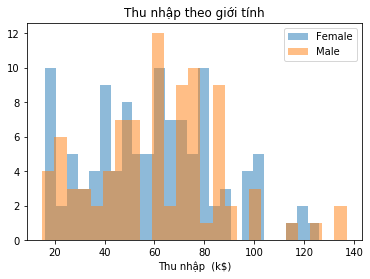

In [11]:
plt.hist('Annual Income (k$)', data=mall_customers_df[mall_customers_df['Gender']=='Female'], label='Female', alpha=0.5, bins=25);
plt.hist('Annual Income (k$)', data=mall_customers_df[mall_customers_df['Gender']=='Male'], label='Male', alpha=0.5, bins=25,);
plt.title('Thu nhập theo giới tính');
plt.xlabel('Thu nhập  (k$)');
plt.legend();

In [12]:
male_customers = mall_customers_df[mall_customers_df['Gender'] == 'Male']
female_customers = mall_customers_df[mall_customers_df['Gender'] == 'Female']

print('Thu nhập trung bình của nam:',male_customers['Annual Income (k$)'].mean())
print('Thu nhập trung bình của nữ:',female_customers['Annual Income (k$)'].mean())

# Tổng thu nhập của nữ
#print(female_customers['Annual Income (k$)'].sum())

Thu nhập trung bình của nam: 62.22727272727273
Thu nhập trung bình của nữ: 59.25


Trung bình thu nhập của nam giới cao hơn nữ giới. Và như vậy liệu có ảnh hưởng đến chi tiêu như thế nào?


In [13]:
male_customers = mall_customers_df[mall_customers_df['Gender'] == 'Male']
female_customers = mall_customers_df[mall_customers_df['Gender'] == 'Female']

# Điểm chi tiêu trung bình của nam và nữ
print('Điểm chi tiêu trung bình của nam:',male_customers['Spending Score (1-100)'].mean())
print('Điểm chi tiêu trung bình của nữ:',female_customers['Spending Score (1-100)'].mean())

Điểm chi tiêu trung bình của nam: 48.51136363636363
Điểm chi tiêu trung bình của nữ: 51.526785714285715


Ta thấy điểm chi tiêu trung bình của nam ít hơn của nữ. Như vậy thu nhập của nữ tuy thấp hơn nhưng lại chi tiêu nhiều hơn.

In [ ]:
Sau đây ta sẽ scatter plot theo từng cặp thuộc tính để xét mối liên hệ.

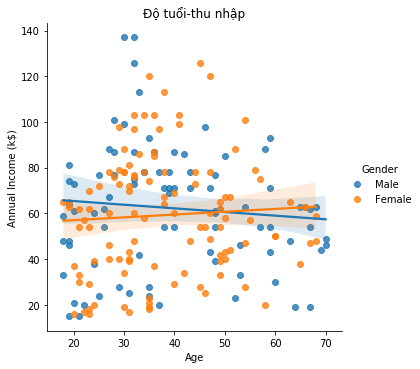

In [14]:
import seaborn as sns
sns.lmplot('Age', 'Annual Income (k$)', hue='Gender', data=mall_customers_df)
plt.title('Độ tuổi-thu nhập');

Ta thấy ở độ tuổi dưới 50 thì thu nhập của nam cao hơn nữ và sau 50 tuổi thì ngược lại.

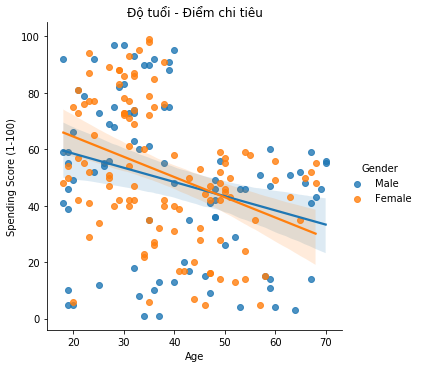

In [15]:
sns.lmplot('Age', 'Spending Score (1-100)', hue='Gender', data=mall_customers_df)
plt.title('Độ tuổi - Điểm chi tiêu');

In [ ]:
Cũng thấy được một số tương quan nhưng không rõ ràng.

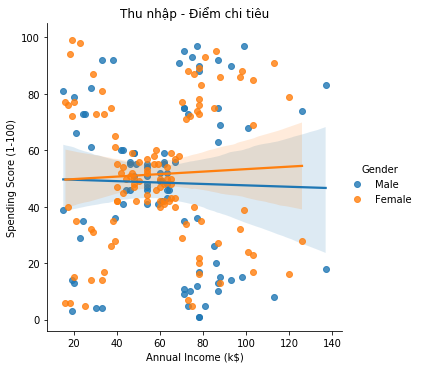

In [21]:
sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=mall_customers_df)
plt.title('Thu nhập - Điểm chi tiêu');

Qua biểu đồ giữa thu nhập và chi tiêu ta thấy có một số phân khúc khách hàng ở đây:
    
    Thu nhập thấp + chi tiêu thấp
    
    Thu nhập thấp + chi tiêu nhiều
    
    Thu nhập trung bình + chi tiêu trung bình
    
    Thu nhập cao + chi tiêu thấp
    
    Thu nhập cao + chi tiêu nhiều

In [16]:
#Using KMeans for clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [17]:
font_title = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

font_axes = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


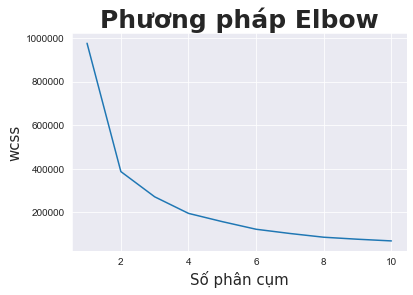

In [60]:
plt.plot(range(1, 11), wcss)
plt.title('Phương pháp Elbow', **font_title)
plt.xlabel('Số phân cụm', **font_axes)
plt.ylabel('wcss', **font_axes)
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


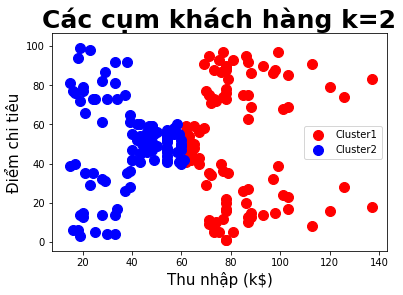

In [19]:
#Taking number of clusters = 2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(df)
X = mall_customers_df.iloc[:, [3, 4]].values
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')

plt.title('Các cụm khách hàng k=2', **font_title)
plt.xlabel('Thu nhập (k$)', **font_axes)
plt.ylabel('Điểm chi tiêu', **font_axes)
plt.legend()
plt.show()

In [20]:
#Taking number of clusters = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(df)
X = mall_customers_df.iloc[:, [3, 4]].values

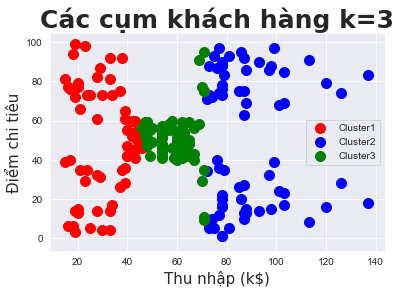

In [67]:
# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')

plt.title('Các cụm khách hàng k=3', **font_title)
plt.xlabel('Thu nhập (k$)', **font_axes)
plt.ylabel('Điểm chi tiêu', **font_axes)
plt.legend()
plt.show()

In [21]:
#Taking number of clusters =5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)


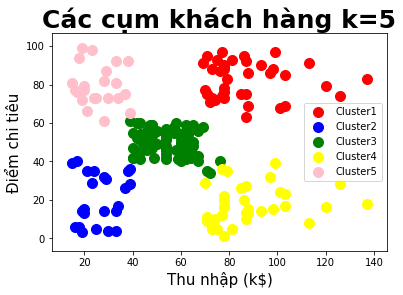

In [22]:
# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Các cụm khách hàng k=5', **font_title)
plt.xlabel('Thu nhập (k$)', **font_axes)
plt.ylabel('Điểm chi tiêu', **font_axes)
plt.legend()
plt.show()

In [24]:
#Taking number of clusters =6
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

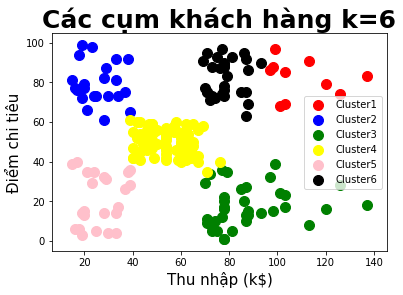

In [25]:
# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster6')
plt.title('Các cụm khách hàng k=6', **font_title)
plt.xlabel('Thu nhập (k$)', **font_axes)
plt.ylabel('Điểm chi tiêu', **font_axes)
plt.legend()
plt.show()

In [ ]:
Cluster bằng spectral ===> không hiệu quả

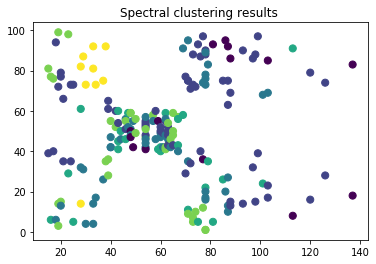

In [26]:
#Using spectral for clustering
#clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(X)
#clustering.labels_
#clustering


clustering = SpectralClustering(n_clusters=6, assign_labels="discretize", random_state=0).fit(df)
y_pred = clustering.labels_
plt.title(f'Spectral clustering results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred);


#Cluster bằng PCA

In [42]:
from sklearn.preprocessing import StandardScaler, normalize 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df) 
X_normalized = normalize(X_scaled) 
from sklearn.decomposition import PCA 
X_normalized = pd.DataFrame(X_normalized) 
pca = PCA(n_components = 4) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3','P4'] 
  
X_principal.head() 

finalDf = pd.concat([X_principal, df[['Annual Income (k$)','Spending Score (1-100)']]], axis = 1)
#print(finalDf)
3print(pca.explained_variance_ratio_)

# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf') 

# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal) 

# Building the label to colour mapping 
colours = {} 
colours[0] = 'blue'
colours[1] = 'y'
colours[2]= 'r'
colours[3]= 'g'
colours[4]='orange'
colours[5]='black'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_rbf] 
  
# Plotting the clustered scatter plot 
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((b, y), ('Label 0', 'Label 1')) 
plt.show() 



SyntaxError: invalid syntax (<ipython-input-42-e4c025a855f5>, line 16)